####Generating the Dataset

In [117]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
!cp /content/drive/MyDrive/Colab\ Notebooks/utilsRand.py /content

In [119]:
!cp /content/drive/MyDrive/Colab\ Notebooks/utils_py.py /content

In [116]:
from utils_py import Dataset

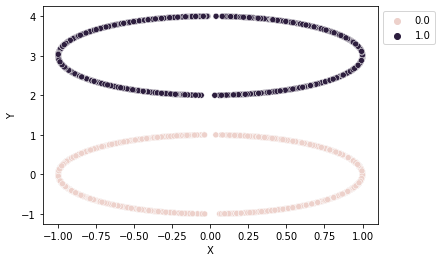

10000


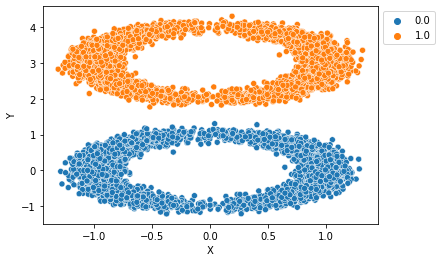

In [120]:
from matplotlib import pyplot as plt
import seaborn as sns


datapoint = Dataset(10000) #10,000 data points
df = datapoint.get(False)

sns.scatterplot(x='X', y='Y', hue='Label', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()
df = df.iloc[1:, :]
print(len(df))

datapoint = Dataset(10000) #10,000 data points
df1 = datapoint.get(True)
df1 = df1.iloc[1:, :]


sns.scatterplot(x='X', y='Y', hue='Label', data=df1, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [121]:
shuffled_df1 = df.sample(frac = 1, random_state = 50)
shuffled_df2 = df1.sample(frac = 1, random_state = 50)
#shuffling the dataset

####PTA1 without *noise*

In [268]:
#Without noise
from utils_py import Perceptron

p = Perceptron(shuffled_df1)
train = shuffled_df1.to_numpy()
x_train_num = train[:,0:2]
y_train_num = train[:,2]

In [269]:
w1,w2,b = p.PTA1(x_train_num,y_train_num,10000,0.01,10)

-0.47093865224279363
90.91787521173788
-89.00000000000863


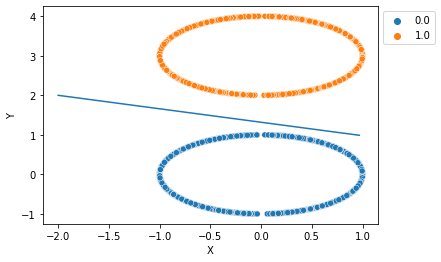

In [271]:
print(w1)
print(w2)
print(b)
p.decision1(w1,w2,b)

####PTA1 with noise

In [272]:
p = Perceptron(shuffled_df2)
train = shuffled_df1.to_numpy()

x_train_num = train[:,0:2]
y_train_num = train[:,2]

In [274]:
w1n,w2n,bn = p.PTA1(x_train_num,y_train_num,10000,0.01,8000)

-0.4576275675062583
89.98426276693317
-89.9400000000091


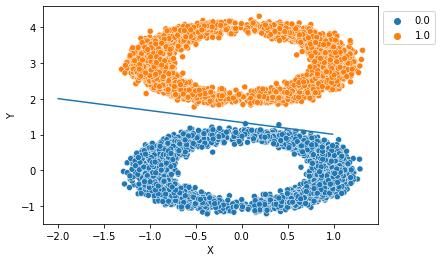

In [275]:
print(w1n)
print(w2n)
print(bn)
p.decision1(w1n,w2n,bn)

####PTA2, with fixed bias and without noise


In [277]:
p = Perceptron(shuffled_df1)
train = shuffled_df1.to_numpy()

In [278]:
w1,w2 = p.PTA2(x_train_num,y_train_num,10000,0.01,8000)

-0.037147127374374304
-11.295496545176931


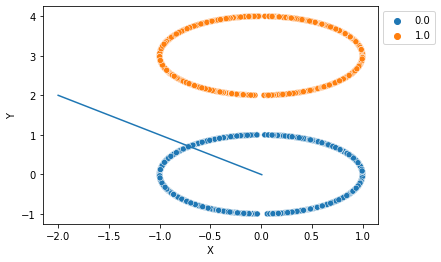

In [279]:
print(w1)
print(w2)
p.decision2(w1,w2)

In [187]:
setf = [0,1]

####XOR DATASET

In [228]:
dataSetListxor = [[]]
import pandas as pd
for i in range(0,2):
    for j in range(0,2):
        listxor = []
        listxor.append(int(setf[i]))
        listxor.append(int(setf[j]))
        listxor.append(int(setf[i]^setf[j]))
        dataSetListxor.append(listxor)

xor_df = pd.DataFrame(dataSetListxor, columns = ['X', 'Y','Label'])
xor_df = xor_df.iloc[1:, :]
print(xor_df)

     X    Y  Label
1  0.0  0.0    0.0
2  0.0  1.0    1.0
3  1.0  0.0    1.0
4  1.0  1.0    0.0


In [243]:
shuffled_df_xor = xor_df.sample(frac = 1, random_state = 50)

p = Perceptron(shuffled_df_xor)
train = shuffled_df_xor.to_numpy()

x_train_num = train[:,0:2]
y_train_num = train[:,2]

In [246]:
w1,w2,b = p.PTA1(x_train_num,y_train_num,4,0.01,100)

/content/utils_py.py:181: RuntimeWarning: invalid value encountered in double_scalars
  y1 = (-1* ((w1*x1) + b))/w2
/content/utils_py.py:183: RuntimeWarning: invalid value encountered in double_scalars
  y2 = (-1* ((w1*x2) + b))/w2


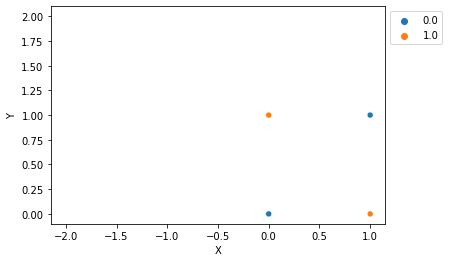

In [249]:
p.decision1(w1,w2,b) #hence the decsion boundary doesn't exit

/content/utils_py.py:192: RuntimeWarning: invalid value encountered in double_scalars
  y1 = (-1* (w1*x1))/w2
/content/utils_py.py:194: RuntimeWarning: invalid value encountered in double_scalars
  y2 = (-1* (w1*x2))/w2


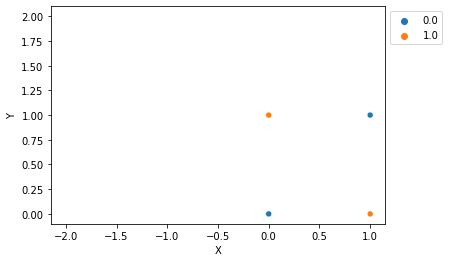

In [250]:
w1,w2 = p.PTA2(x_train_num,y_train_num,4,0.01,100)
p.decision2(w1,w2) #hence the decsion boundary doesn't exit

####AND BIAS :*italicized text*

In [233]:
dataSetListand = [[]]
import pandas as pd
for i in range(0,2):
    for j in range(0,2):
        listand = []
        listand.append(int(setf[i]))
        listand.append(int(setf[j]))
        listand.append(int(setf[i]&setf[j]))
        dataSetListand.append(listand)

and_df = pd.DataFrame(dataSetListand, columns = ['X', 'Y','Label'])
and_df = and_df.iloc[1:, :]
print(and_df)

     X    Y  Label
1  0.0  0.0    0.0
2  0.0  1.0    0.0
3  1.0  0.0    0.0
4  1.0  1.0    1.0


In [251]:
shuffled_df_and = and_df.sample(frac = 1, random_state = 50)

p = Perceptron(shuffled_df_and)
train = shuffled_df_and.to_numpy()

x_train_num = train[:,0:2]
y_train_num = train[:,2]

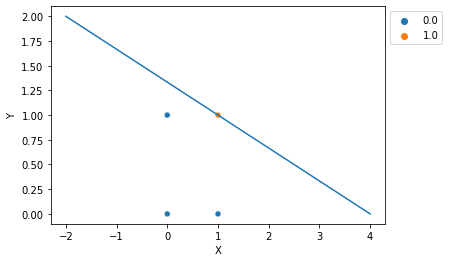

In [253]:
w1,w2,b = p.PTA1(x_train_num,y_train_num,4,0.01,100)
p.decision1(w1,w2,b) #hence the decsion boundary doesn't exit

/content/utils_py.py:192: RuntimeWarning: invalid value encountered in double_scalars
  y1 = (-1* (w1*x1))/w2
/content/utils_py.py:194: RuntimeWarning: invalid value encountered in double_scalars
  y2 = (-1* (w1*x2))/w2


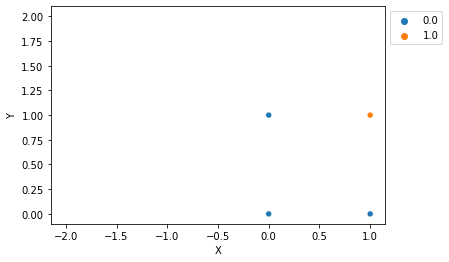

In [254]:
w1,w2 = p.PTA2(x_train_num,y_train_num,4,0.01,100) #without bias
p.decision2(w1,w2)

####OR dataset

In [238]:
dataSetListor = [[]]
import pandas as pd
for i in range(0,2):
    for j in range(0,2):
        listor = []
        listor.append(int(setf[i]))
        listor.append(int(setf[j]))
        listor.append(int(setf[i] | setf[j]))
        dataSetListor.append(listor)

or_df = pd.DataFrame(dataSetListor, columns = ['X', 'Y','Label'])
or_df = or_df.iloc[1:, :]
print(or_df)

     X    Y  Label
1  0.0  0.0    0.0
2  0.0  1.0    1.0
3  1.0  0.0    1.0
4  1.0  1.0    1.0


In [257]:
shuffled_df_or = or_df.sample(frac = 1, random_state = 50)

p = Perceptron(shuffled_df_or)
train = shuffled_df_or.to_numpy()

x_train_num = train[:,0:2]
y_train_num = train[:,2]

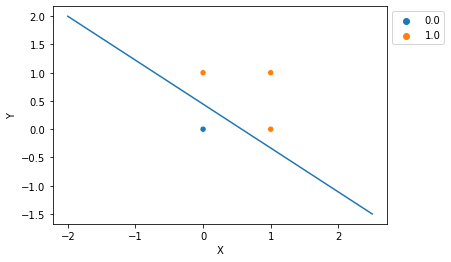

In [260]:
w1,w2,b = p.PTA1(x_train_num,y_train_num,4,0.01,10)
p.decision1(w1,w2,b) #hence the decsion boundary doesn't exit

In [264]:
w1,w2 = p.PTA2(x_train_num,y_train_num,4,0.01,100) #without bias

try:
  p.decision2(w1,w2)
except:
  print("Decision Boundary exception")

Decision Boundary exception
